# Human Activity Recognition Using Convolution Neural Network with Sliding Window

## Subject 1 Data import

1. Import pandas,numpy and matplotlib libraries.
2. Reading the sensor values for subject 1 and subject 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_sub1=pd.read_csv('df_sub1.csv')

## Subject 2 Data import

In [4]:
df_sub2=pd.read_csv('df_sub2.csv')

In [5]:
df_sub1=pd.DataFrame(df_sub1)
df_sub2=pd.DataFrame(df_sub2)

## Concat the dataframes of 2 subjects

In [6]:
frames=[df_sub1,df_sub2]
combined_frame=pd.concat(frames)

In [7]:
combined_frame.loc[combined_frame['Label'] == 'dribbling']

,E1,E2,E3,E4,E5,E6,Label,A1,A2,A3,W1,W2,W3
32174,-0.616943,-0.362305,-0.178467,-163.353659,-113.414634,38.871951,dribbling,-0.86426,-0.49463,0.34448,0.50708,0.84814,0.93628
32175,-0.607544,-0.351288,-0.175659,-163.544207,-113.433689,39.249238,dribbling,-0.85718,-0.49585,0.30151,0.48926,0.81689,0.90112
32176,-0.598145,-0.340271,-0.172852,-163.734756,-113.452744,39.626524,dribbling,-0.93701,-0.39648,0.08472,0.48022,0.75684,0.85718
32177,-0.579346,-0.318237,-0.167236,-164.115854,-113.490854,40.381098,dribbling,-1.00317,-0.24487,-0.07593,0.43359,0.66968,0.84961
32178,-0.569946,-0.307220,-0.164429,-164.306402,-113.509909,40.758384,dribbling,-1.05054,-0.13062,-0.13770,0.42041,0.64136,0.77393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46785,-0.883362,-0.218109,-0.134979,-4.649390,5.114329,-9.607470,dribbling,-1.70679,-0.06372,1.43555,-0.03516,0.17358,1.29932
46786,-0.893066,-0.220947,-0.133545,-3.963415,5.121951,-8.932927,dribbling,-1.58447,-0.11304,1.28076,-0.02881,0.14282,1.31006
46787,-0.845459,-0.143799,-0.145996,9.695122,4.939024,1.890244,dribbling,-1.05371,-0.17627,0.80176,-0.02661,0.08984,1.31104
46788,-0.843533,-0.139838,-0.148139,9.684959,5.318428,2.063008,dribbling,-0.88794,-0.34277,0.70703,-0.02856,0.02100,1.29346


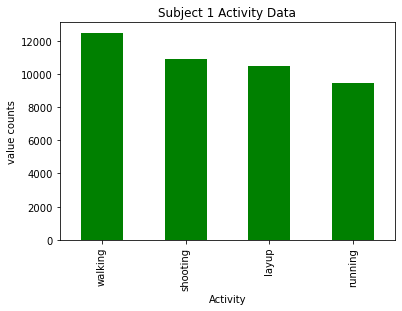

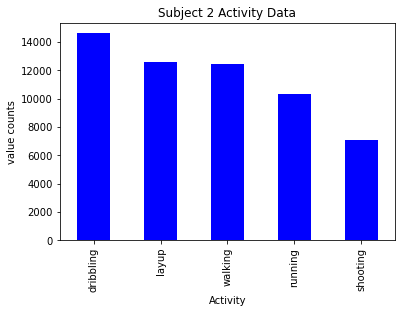

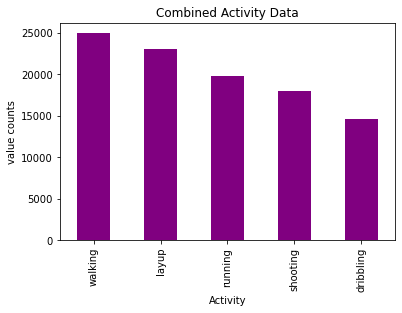

In [8]:
p=plt.figure(1)
df_sub1['Label'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Activity')
plt.ylabel('value counts')
plt.title('Subject 1 Activity Data')

q=plt.figure(2)
df_sub2['Label'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Activity')
plt.ylabel('value counts')
plt.title('Subject 2 Activity Data')
plt.show()

r=plt.figure(3)
combined_frame['Label'].value_counts().plot(kind='bar',color='purple')
plt.xlabel('Activity')
plt.ylabel('value counts')
plt.title('Combined Activity Data')
plt.show()

## Creating data frames for each subject

In [9]:
walking= df_sub1[df_sub1['Label']=='walking'].copy()
layup= df_sub1[df_sub1['Label']=='layup'].copy()
running= df_sub1[df_sub1['Label']=='running'].copy()
shooting= df_sub1[df_sub1['Label']=='shooting'].copy()
dribbling= df_sub1[df_sub1['Label']=='dribbling'].copy()
null= df_sub1[df_sub1['Label']=='null'].copy()
Subject1_data=pd.DataFrame()
Subject1_data=Subject1_data.append([walking,layup,running,shooting,dribbling,null])

In [10]:
walking= df_sub2[df_sub2['Label']=='walking'].copy()
layup= df_sub2[df_sub2['Label']=='layup'].copy()
running= df_sub2[df_sub2['Label']=='running'].copy()
shooting= df_sub2[df_sub2['Label']=='shooting'].copy()
dribbling= df_sub2[df_sub2['Label']=='dribbling'].copy()
null= df_sub2[df_sub2['Label']=='null'].copy()
Subject2_data=pd.DataFrame()
Subject2_data=Subject2_data.append([walking,layup,running,shooting,dribbling,null])

## Creating Data Frame for the combined data of both the subjects

In [11]:
walking= combined_frame[combined_frame['Label']=='walking'].copy()
layup= combined_frame[combined_frame['Label']=='layup'].copy()
running= combined_frame[combined_frame['Label']=='running'].copy()
shooting= combined_frame[combined_frame['Label']=='shooting'].copy()
dribbling= combined_frame[combined_frame['Label']=='dribbling'].copy()
null= combined_frame[combined_frame['Label']=='null'].copy()
Combined_data=pd.DataFrame()
Combined_data=Combined_data.append([walking,layup,running,shooting,dribbling,null])

In [12]:
Combined_data['Label'].value_counts()

walking      24948
layup        23100
running      19824
shooting     17976
dribbling    14616
Name: Label, dtype: int64

## Encoding the labels for training

In [13]:
from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder()
Combined_data['label']=Label.fit_transform(Combined_data['Label'])
Subject1_data['label']=Label.fit_transform(Subject1_data['Label'])
Subject2_data['label']=Label.fit_transform(Subject2_data['Label'])
Label.classes_

array(['dribbling', 'layup', 'running', 'shooting', 'walking'],
      dtype=object)

In [14]:
column = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'A1', 'A2', 'A3', 'W1', 'W2', 'W3']
X=Combined_data[column]
Y=Combined_data['label']


## Normalizing the datasets

### Creating 2 datasets one with normalized data and one without normalization for further training and validation

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(X)

Combined_data_scaled=pd.DataFrame(data=x, columns=column)
Combined_data_scaled['label']=Y.values


## Constructing the Frames/Windows

#### The function frames(dataFrame,frameSize,hopsize) takes the parameters and returns the lists(ie . frames and labels) which are collection of frames and labels differing by the hopsize to get data for the duration of activity
#### Here the duration is taken to be 5 seconds . This implies that each frame(list) has the sensor data for a duration of 5 seconds. Also each frame in frames differs by 2 seconds as calculated in the previous cell 
     

In [16]:
import scipy.stats as stats

frequency=100
frame_size = frequency*5
hopsize = frequency*2

In [17]:
def frames(dataFrame,frameSize,hopsize):
    featureCount=12
    frames=[]
    labels=[]
    for i in range(0,len(dataFrame)-frameSize,hopsize):
        E1=dataFrame['E1'].values[i : i+frameSize]
        E2=dataFrame['E2'].values[i : i+frameSize]
        E3=dataFrame['E3'].values[i : i+frameSize]
        E4=dataFrame['E4'].values[i : i+frameSize]
        E5=dataFrame['E5'].values[i : i+frameSize]
        E6=dataFrame['E6'].values[i : i+frameSize]
        A1=dataFrame['A1'].values[i : i+frameSize]
        A2=dataFrame['A2'].values[i : i+frameSize]
        A3=dataFrame['A3'].values[i : i+frameSize]
        W1=dataFrame['W1'].values[i : i+frameSize]
        W2=dataFrame['W2'].values[i : i+frameSize]
        W3=dataFrame['W3'].values[i : i+frameSize]


        label= stats.mode(dataFrame['label'][i : i+frameSize])[0][0]
        frames.append([E1, E2, E3, E4, E5, E6, A1, A2, A3, W1, W2, W3])
        labels.append(label)
    
    frames=np.asarray(frames).reshape(-1,frameSize,featureCount)
    labels=np.asarray(labels)
    return frames,labels



In [18]:
X,y = frames(Combined_data,frame_size,hopsize)
X_S1,y_S1=frames(Subject1_data,frame_size,hopsize)
X_S2,y_S2=frames(Subject2_data,frame_size,hopsize)

X_scaled,y_scaled = frames(Combined_data_scaled,frame_size,hopsize)


### Here we are getting 500 frames with each frame of size (500,12) i.e 500 entries with 12 features(classes) and the corresponding labels. That is each frame has a distinct label which is calculated with the help of taking mode of labels for the activity as in previous cell

In [19]:
X.shape , y.shape , X_S1.shape, y_S1.shape ,X_S2.shape , y_S2.shape

((500, 500, 12), (500,), (215, 500, 12), (215,), (283, 500, 12), (283,))

## Train Test Split

### Train test split for the combined and non combined data of the subjects

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y , test_size=0.3,random_state=0, stratify= y)
X_s1_train,X_s1_test,y_s1_train,y_s1_test= train_test_split(X_S1,y_S1 , test_size=0.3,random_state=0, stratify= y_S1)
X_s2_train,X_s2_test,y_s2_train,y_s2_test= train_test_split(X_S2,y_S2, test_size=0.3,random_state=0, stratify= y_S2)


X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y_scaled , test_size=0.3,random_state=0, stratify= y_scaled)

In [27]:
X_train.shape,X_test.shape , X_s1_train.shape,X_s1_test.shape ,X_s2_train.shape,X_s2_test.shape

((350, 500, 12),
 (150, 500, 12),
 (150, 500, 12),
 (65, 500, 12),
 (198, 500, 12),
 (85, 500, 12))

The model is implementing Conv2D layer and hence it requires data of 3 dimensions at least. The train and testing data is reshaped below

In [28]:
X_train=X_train.reshape(350, 500, 12, 1)
X_test=X_test.reshape(150, 500, 12,1)

X_s1_train=X_s1_train.reshape(150, 500, 12, 1)
X_s1_test=X_s1_test.reshape(65, 500, 12,1)

X_s2_train=X_s2_train.reshape(198, 500, 12, 1)
X_s2_test=X_s2_test.reshape(85, 500, 12,1)

X_train_scaled=X_train_scaled.reshape(350, 500, 12, 1)
X_test_scaled=X_test_scaled.reshape(150, 500, 12,1)


## Building the model

In [51]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,ReLU,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model1 = Sequential()
model1.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(500,12,1)))

model1.add(Dropout(0.3))

model1.add(Conv2D(32,(2,2),activation='relu'))

model1.add(Dropout(0.5))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))

model1.add(Dense(6,activation='softmax'))

model1.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
model2 = Sequential()
model2.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(500,12,1)))

model2.add(Dropout(0.3))

model2.add(Conv2D(32,(2,2),activation='relu'))

model2.add(Dropout(0.5))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))

model2.add(Dense(6,activation='softmax'))

model2.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
model3 = Sequential()
model3.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(500,12,1)))

model3.add(Dropout(0.3))

model3.add(Conv2D(32,(2,2),activation='relu'))

model3.add(Dropout(0.5))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))

model3.add(Dense(6,activation='softmax'))

model3.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [84]:
model4 = Sequential()
model4.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(500,12,1)))

model4.add(Dropout(0.3))

model4.add(Conv2D(32,(2,2),activation='relu'))

model4.add(Dropout(0.5))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))

model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))

model4.add(Dense(6,activation='softmax'))

model4.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
model5 = Sequential()
model5.add(Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=(500,12,1)))

model5.add(Dropout(0.3))

model5.add(Conv2D(32,(2,2),activation='relu'))

model5.add(Dropout(0.5))

model5.add(Flatten())

model5.add(Dense(128, activation='relu'))

model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))

model5.add(Dense(6,activation='softmax'))

model5.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Training the model using Cross Subject Validation

In [54]:
history_cross_subject_validation=model1.fit(X_s2_train,y_s2_train,epochs=15,validation_data=(X_s1_test,y_s1_test),verbose=1)

Epoch 1/15
7/7 [==============================] - 1s 146ms/step - loss: 20.3296 - accuracy: 0.2121 - val_loss: 7.9364 - val_accuracy: 0.0308
Epoch 2/15
7/7 [==============================] - 1s 147ms/step - loss: 9.9383 - accuracy: 0.3081 - val_loss: 6.3173 - val_accuracy: 0.0462
Epoch 3/15
7/7 [==============================] - 1s 132ms/step - loss: 5.1260 - accuracy: 0.3333 - val_loss: 3.2915 - val_accuracy: 0.0462
Epoch 4/15
7/7 [==============================] - 1s 133ms/step - loss: 3.2141 - accuracy: 0.3990 - val_loss: 3.4438 - val_accuracy: 0.0154
Epoch 5/15
7/7 [==============================] - 1s 131ms/step - loss: 1.9709 - accuracy: 0.3788 - val_loss: 2.6023 - val_accuracy: 0.0000e+00
Epoch 6/15
7/7 [==============================] - 1s 121ms/step - loss: 1.4931 - accuracy: 0.4545 - val_loss: 2.3306 - val_accuracy: 0.0000e+00
Epoch 7/15
7/7 [==============================] - 1s 125ms/step - loss: 1.3570 - accuracy: 0.4848 - val_loss: 2.1298 - val_accuracy: 0.0000e+00
Epoch 8

## Training the model using combined data

### Unscaled Data 

In [56]:
history_combined_Validation=model2.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
11/11 [==============================] - 2s 153ms/step - loss: 0.7507 - accuracy: 0.7343 - val_loss: 0.8868 - val_accuracy: 0.7467
Epoch 2/20
11/11 [==============================] - 2s 153ms/step - loss: 0.7627 - accuracy: 0.7171 - val_loss: 0.9543 - val_accuracy: 0.6800
Epoch 3/20
11/11 [==============================] - 2s 153ms/step - loss: 0.6744 - accuracy: 0.7571 - val_loss: 0.8464 - val_accuracy: 0.7333
Epoch 4/20
11/11 [==============================] - 2s 155ms/step - loss: 0.6290 - accuracy: 0.7800 - val_loss: 0.7591 - val_accuracy: 0.7867
Epoch 5/20
11/11 [==============================] - 2s 153ms/step - loss: 0.6717 - accuracy: 0.7657 - val_loss: 0.7328 - val_accuracy: 0.8267
Epoch 6/20
11/11 [==============================] - 2s 154ms/step - loss: 0.4586 - accuracy: 0.8257 - val_loss: 0.6272 - val_accuracy: 0.8267
Epoch 7/20
11/11 [==============================] - 2s 150ms/step - loss: 0.5023 - accuracy: 0.8057 - val_loss: 0.5773 - val_accuracy: 0.8267
Epoch 

### Scaled(Normalized Data)

In [59]:
history_combined_Validation_scaled=model3.fit(X_train_scaled,y_train_scaled,epochs=15,validation_data=(X_test_scaled,y_test_scaled),verbose=1)

Epoch 1/15
11/11 [==============================] - 2s 158ms/step - loss: 2.9111 - accuracy: 0.3886 - val_loss: 0.7849 - val_accuracy: 0.6400
Epoch 2/15
11/11 [==============================] - 2s 146ms/step - loss: 1.0976 - accuracy: 0.6543 - val_loss: 0.6480 - val_accuracy: 0.9333
Epoch 3/15
11/11 [==============================] - 2s 148ms/step - loss: 0.5325 - accuracy: 0.8571 - val_loss: 0.4573 - val_accuracy: 0.9467
Epoch 4/15
11/11 [==============================] - 2s 149ms/step - loss: 0.2693 - accuracy: 0.9314 - val_loss: 0.2192 - val_accuracy: 0.9600
Epoch 5/15
11/11 [==============================] - 2s 149ms/step - loss: 0.2088 - accuracy: 0.9371 - val_loss: 0.2123 - val_accuracy: 0.9533
Epoch 6/15
11/11 [==============================] - 2s 149ms/step - loss: 0.1091 - accuracy: 0.9686 - val_loss: 0.1927 - val_accuracy: 0.9533
Epoch 7/15
11/11 [==============================] - 2s 147ms/step - loss: 0.1111 - accuracy: 0.9686 - val_loss: 0.1492 - val_accuracy: 0.9733
Epoch 

## Plotting the learning curve

In [60]:
import matplotlib.pyplot as plt
def plotCurve(history,epochs):
    epoc_range=range(1,epochs+1)
    plt.plot(epoc_range,history.history['accuracy'])
    plt.plot(epoc_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()


    plt.plot(epoc_range,history.history['loss'])
    plt.plot(epoc_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()




## Combined Subject Validation Metrics

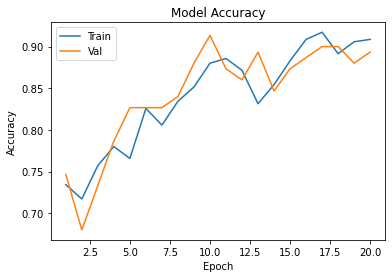

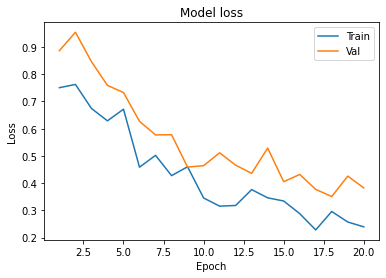

In [62]:
plotCurve(history_combined_Validation,20)

## Cross Subject Validation metrics

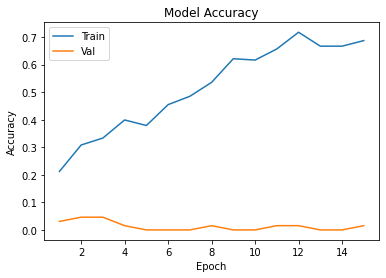

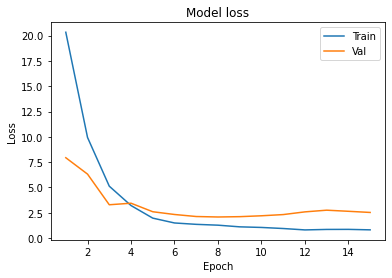

In [63]:
plotCurve(history_cross_subject_validation,15)

## Combined Subject Validation Metrics for scaled data

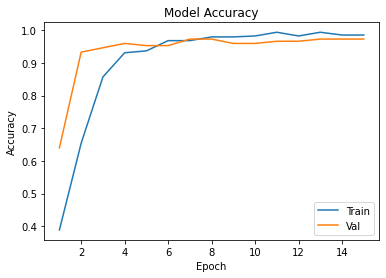

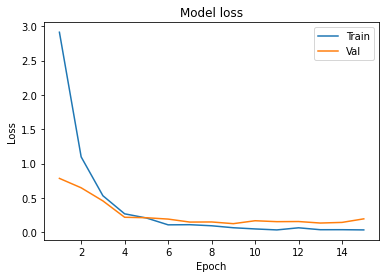

In [64]:
plotCurve(history_combined_Validation_scaled,15)

## Confusion Matrix

In [48]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

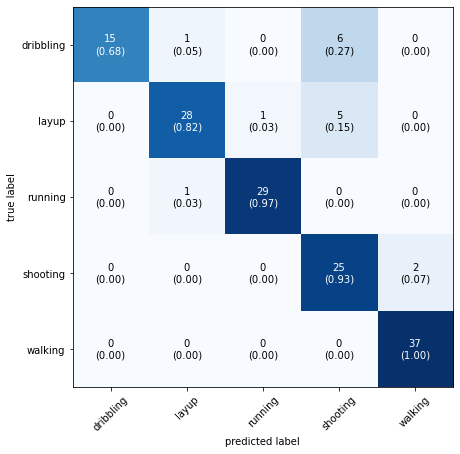

In [65]:
y_pred=model2.predict_classes(X_test)
cmatrix=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cmatrix,class_names=Label.classes_, show_normed=True,figsize=(7,7))

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

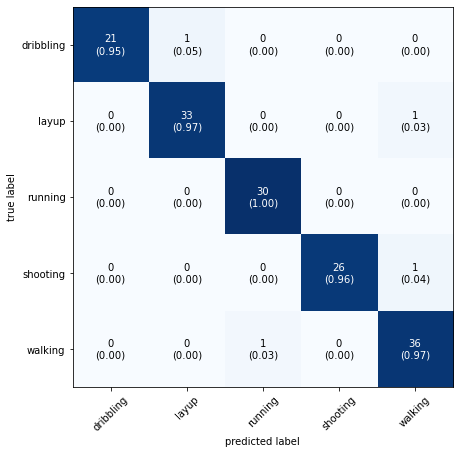

In [66]:
y_pred=model3.predict_classes(X_test_scaled)
cmatrix=confusion_matrix(y_test_scaled,y_pred)
plot_confusion_matrix(conf_mat=cmatrix,class_names=Label.classes_, show_normed=True,figsize=(7,7))

## Stratified Cross Validation Approach

In [82]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=2, shuffle=True)


In [85]:

X.shape,y.shape
X=X.reshape(500,500,12,1)

In [86]:
scores=[]
i=1
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("Iteration ",i)
    X_train,X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    history_stratified_n_fold=model4.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)
    scores.append(model4.evaluate(X_test,y_test))
    i+=1

Iteration  1
Epoch 1/10
13/13 [==============================] - 2s 166ms/step - loss: 24.7434 - accuracy: 0.2150 - val_loss: 3.2016 - val_accuracy: 0.4800
Epoch 2/10
13/13 [==============================] - 2s 143ms/step - loss: 3.4158 - accuracy: 0.3225 - val_loss: 1.4957 - val_accuracy: 0.3900
Epoch 3/10
13/13 [==============================] - 2s 140ms/step - loss: 1.5679 - accuracy: 0.3475 - val_loss: 1.5347 - val_accuracy: 0.5300
Epoch 4/10
13/13 [==============================] - 2s 141ms/step - loss: 1.5072 - accuracy: 0.3800 - val_loss: 1.4265 - val_accuracy: 0.4100
Epoch 5/10
13/13 [==============================] - 2s 139ms/step - loss: 1.4616 - accuracy: 0.4050 - val_loss: 1.3310 - val_accuracy: 0.4700
Epoch 6/10
13/13 [==============================] - 2s 139ms/step - loss: 1.3844 - accuracy: 0.4400 - val_loss: 1.3407 - val_accuracy: 0.4600
Epoch 7/10
13/13 [==============================] - 2s 142ms/step - loss: 1.2299 - accuracy: 0.4475 - val_loss: 1.4694 - val_accuracy:

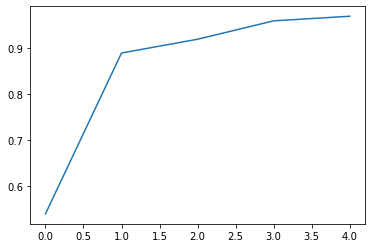

In [87]:
scores=np.asarray(scores)
plt.plot(range(0,5),scores[:,1])

In [93]:
scores

array([[1.35632646, 0.54000002],
       [0.50744462, 0.88999999],
       [0.34016761, 0.92000002],
       [0.16586331, 0.95999998],
       [0.12594239, 0.97000003]])

In [88]:
accuracy=np.array(scores)
accuracy[:,1].mean()

0.8560000061988831

### with normalized data

In [95]:
skf2 = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
skf2.get_n_splits(X_scaled, y_scaled)
print(skf)
X_scaled=X_scaled.reshape(500,500,12,1)

scores2=[]

i=1
for train_index, test_index in skf2.split(X_scaled, y_scaled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print("Iteration ",i)
    X_train,X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]
    history_stratified_n_fold=model5.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),verbose=1)
    scores2.append(model5.evaluate(X_test,y_test))
    i+=1

StratifiedKFold(n_splits=5, random_state=2, shuffle=True)
Iteration  1
Epoch 1/5
13/13 [==============================] - 2s 146ms/step - loss: 4.1045 - accuracy: 0.3500 - val_loss: 0.7029 - val_accuracy: 0.7500
Epoch 2/5
13/13 [==============================] - 2s 145ms/step - loss: 0.8786 - accuracy: 0.7025 - val_loss: 0.5354 - val_accuracy: 0.9300
Epoch 3/5
13/13 [==============================] - 2s 143ms/step - loss: 0.5259 - accuracy: 0.8575 - val_loss: 0.3940 - val_accuracy: 0.9500
Epoch 4/5
13/13 [==============================] - 2s 144ms/step - loss: 0.3155 - accuracy: 0.9025 - val_loss: 0.2491 - val_accuracy: 0.9700
Epoch 5/5
4/4 [==============================] - 0s 12ms/step - loss: 0.2299 - accuracy: 0.9600
Iteration  2
Epoch 1/5
13/13 [==============================] - 2s 146ms/step - loss: 0.2432 - accuracy: 0.9375 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 2s 145ms/step - loss: 0.2049 - accuracy: 0.9475 - val_loss: 0.02

0.8560000061988831

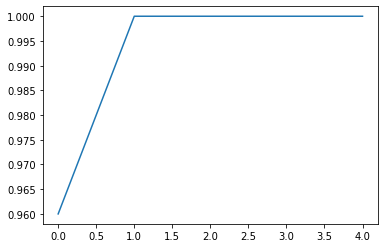

In [96]:
scores2=np.asarray(scores2)
plt.plot(range(0,5),scores2[:,1])


accuracy=np.array(scores)
accuracy[:,1].mean()

## Other metrics

In [98]:
#All metric
import tensorflow.keras as Keras
def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = np.sum(np.round(np.clip(y_true * y_pred, 0, 1)))
    possible_positives = np.sum(np.round(np.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + Keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = np.sum(
        np.round(np.clip(y_true * y_pred, 0, 1)))
    predicted_positives = np.sum(
        np.round(np.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + Keras.backend.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + Keras.backend.epsilon()))

In [103]:
y_pred=model5.predict_classes(X_test_scaled)
y_pred.shape

(150,)

In [105]:
y_pred=model5.predict_classes(X_test_scaled)
y_pred.shape
recall1= recall(y_test_scaled,y_pred)
prec=precision_m(y_test_scaled,y_pred)
f1_m= 2 * ((prec * recall1) / (prec + recall1 + Keras.backend.epsilon()))

In [106]:
f1_m

0.9999999492187527

In [107]:
print(history_combined_Validation)

## Summary